<a href="https://colab.research.google.com/github/FelipiFreo/indicium-ds-rental-pricing-challenge/blob/main/indicium_ds_rental_pricing_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [2]:
# Load the CSV file from Google Drive
!pip install gdown

import gdown

file_id = '1oVQ1xzFkkavnCu4usj3oEfrhOVQG-Dtt'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Desafio Ciência de Dados - Precificação 2024-4.csv'

gdown.download(url, output, quiet=False)

df = pd.read_csv(output)



Downloading...
From: https://drive.google.com/uc?id=1oVQ1xzFkkavnCu4usj3oEfrhOVQG-Dtt
To: /content/Desafio Ciência de Dados - Precificação 2024-4.csv
100%|██████████| 7.08M/7.08M [00:00<00:00, 79.9MB/s]


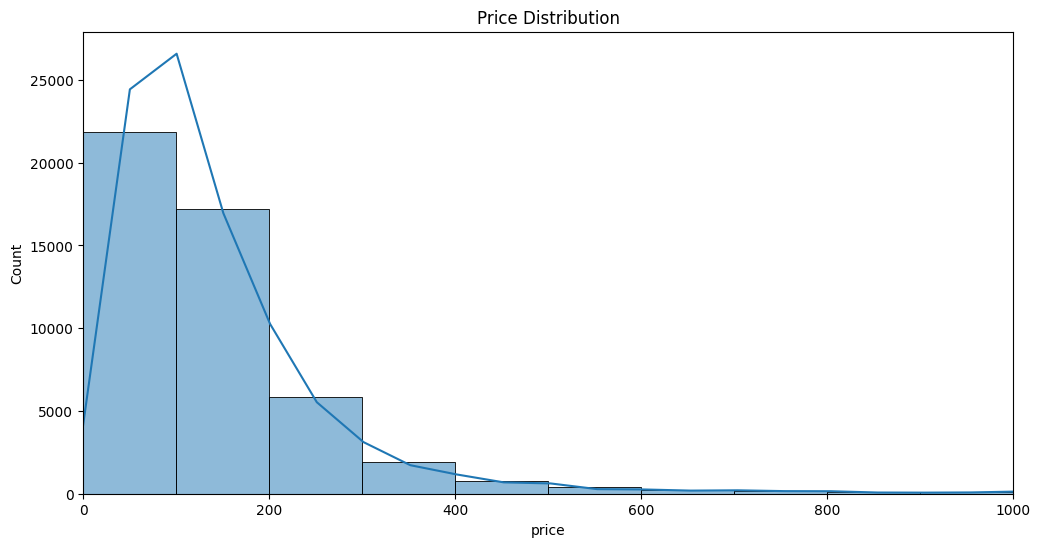

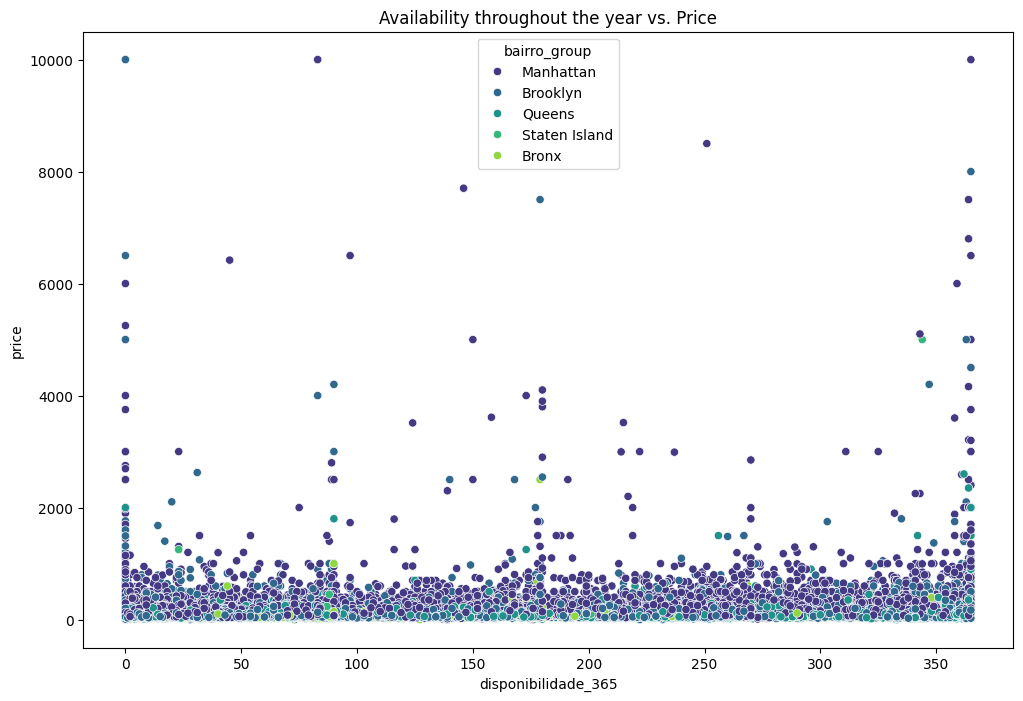

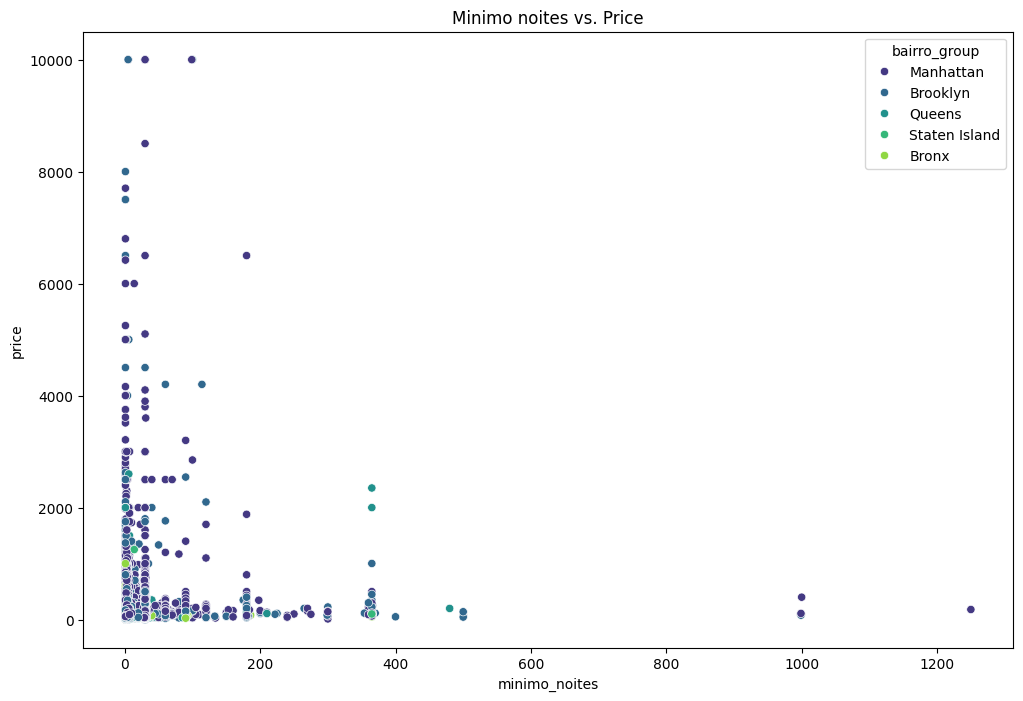

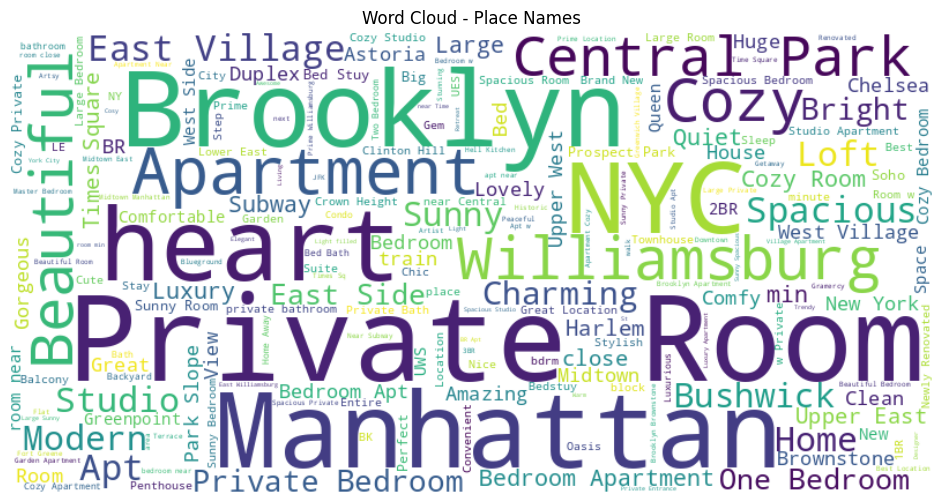

In [3]:
# 1. Exploratory Data Analysis (EDA)

# Explore price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlim(0, 1000)
plt.show()

# Relationship between variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, hue='bairro_group', palette='viridis')
plt.title('Availability throughout the year vs. Price')
plt.show()

# Relationship between variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='minimo_noites', y='price', data=df, hue='bairro_group', palette='viridis')
plt.title('Minimo noites vs. Price')
plt.show()

# Word cloud from the names of places
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['nome'].astype(str)))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Place Names')
plt.axis('off')
plt.show()

<ipython-input-4-975beace6344>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


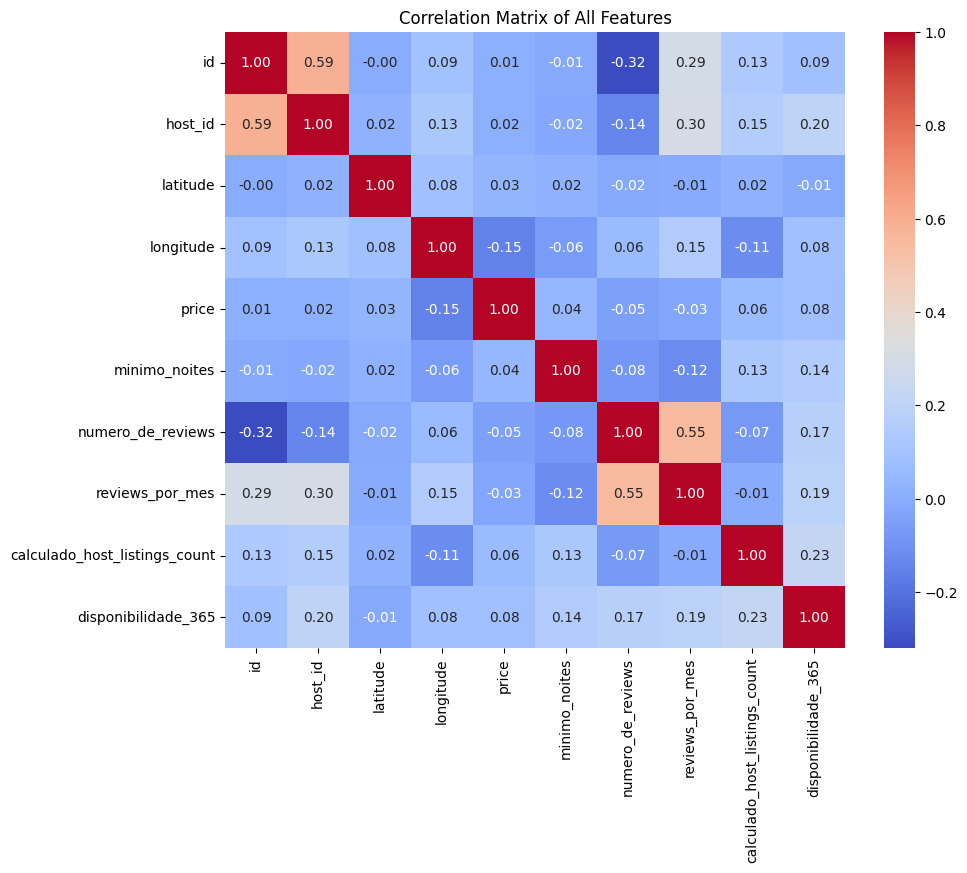

In [4]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of All Features')
plt.show()

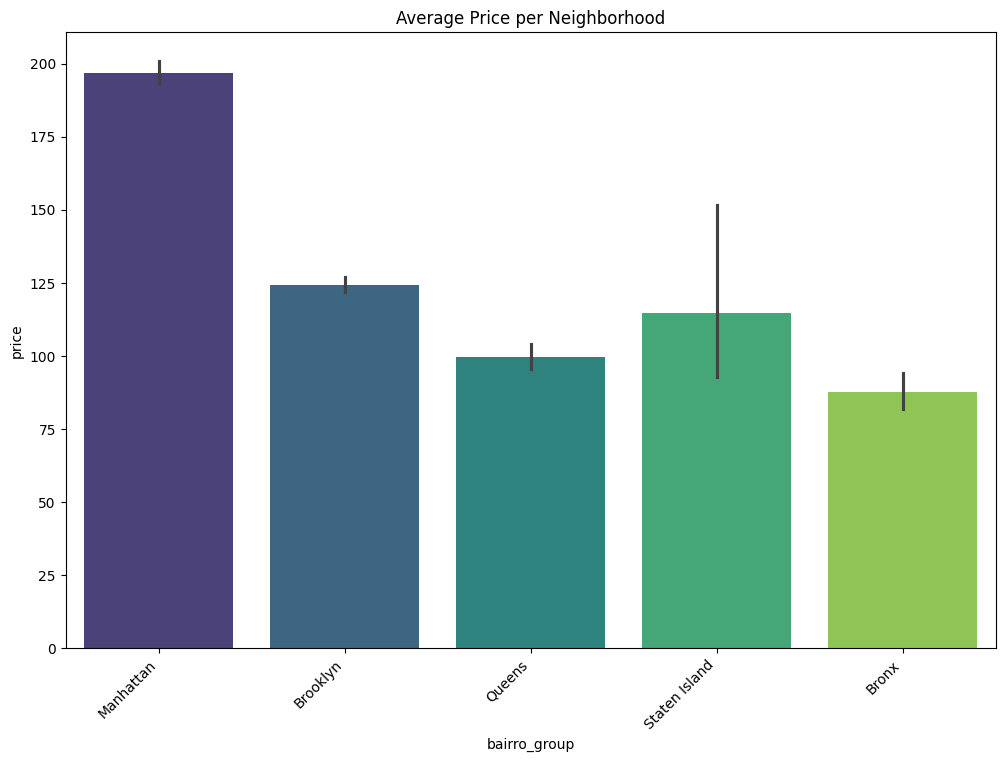

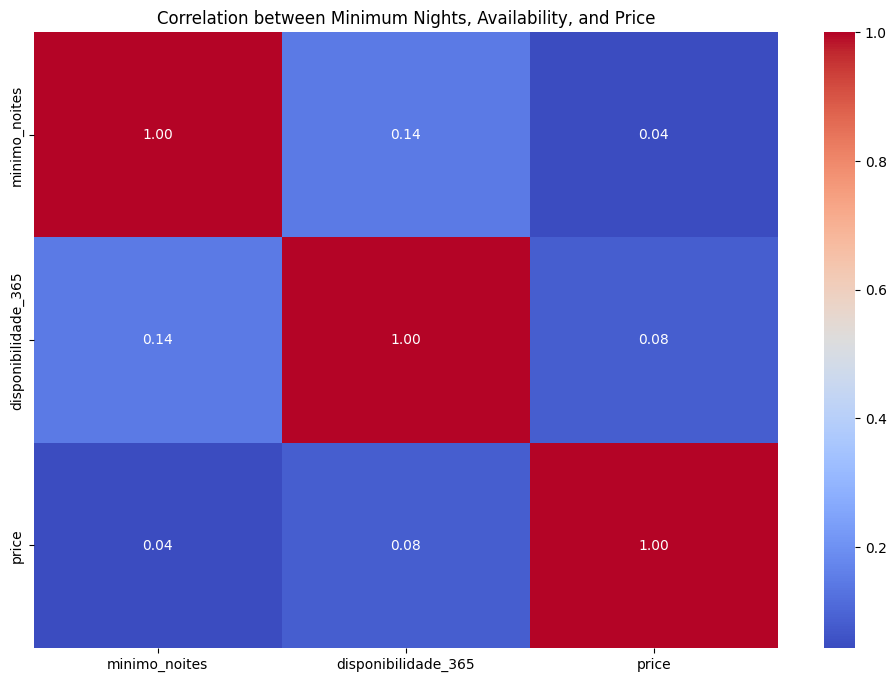

In [5]:
# 2. Answers to Questions:

# a. Location to Invest
plt.figure(figsize=(12, 8))
sns.barplot(x='bairro_group', y='price', data=df, palette='viridis', hue='bairro_group', legend=False)
plt.title('Average Price per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

# b. Impact of Minimum Nights and Availability
correlation_nights_availability_price = df[['minimo_noites', 'disponibilidade_365', 'price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_nights_availability_price, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Minimum Nights, Availability, and Price')
plt.show()

In [6]:
# 3. Price Prediction:

# Encode categorical variable 'bairro_group'
le_bairro = LabelEncoder()
df['bairro_group_encoded'] = le_bairro.fit_transform(df['bairro_group'])

# Train the model (Polynomial Regression)
poly_degree = 2  # Degree of the polynomial

polyreg = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(
    df[['bairro_group_encoded', 'minimo_noites', 'disponibilidade_365']],
    df['price'],
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

polyreg.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [7]:
# Save the trained model as a pickle string.

model = polyreg.fit(X_train_scaled, y_train)

saved_model = 'my_model.pkl'
with open(saved_model, 'wb') as file:
  pickle.dump(model, file)

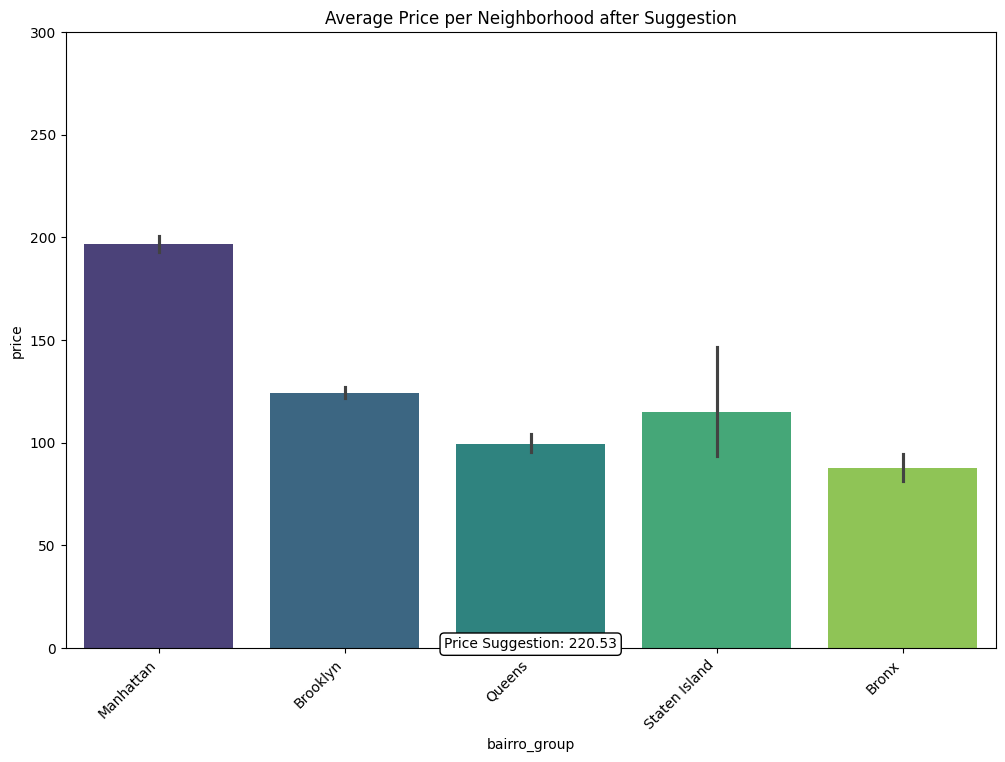

In [8]:
# 4. Price Suggestion:

# Data for the apartment with the provided characteristics
apartment_data = {
    'bairro_group': 'Manhattan',
    'minimo_noites': 1,
    'disponibilidade_365': 355
}

# Create a DataFrame for the new apartment
apartment_df = pd.DataFrame(apartment_data, index=[0])

# Encode categorical variable for the new apartment
apartment_df['bairro_group_encoded'] = le_bairro.transform(apartment_df['bairro_group'])

# Scale the data
apartment_scaled = scaler.transform(apartment_df[['bairro_group_encoded', 'minimo_noites', 'disponibilidade_365']])

# Predict the price for the new apartment using Polynomial Regression
predicted_price = polyreg.predict(apartment_scaled)

# Visualization of average prices per neighborhood after the price suggestion
plt.figure(figsize=(12, 8))
sns.barplot(x='bairro_group', y='price', data=df, palette='viridis', hue='bairro_group', legend=False)
plt.title('Average Price per Neighborhood after Suggestion')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300)

# Annotation for the price suggestion
plt.annotate(
    f'Price Suggestion: {predicted_price[0]:.2f}',
    xy=(0.5, 0), xycoords='axes fraction', ha='center',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    fontsize=10, color='black'
)

plt.show()


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Gerar um arquivo de requisitos
!pip freeze > requirements.txt
